In [1]:
## imports and global variables
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import warnings
from random import randint
warnings.filterwarnings('ignore')
SEED=randint(0,100)

In [2]:
## read csv, build trainset, 
## filter dataset to include only the digits 0 through 4.
train=pd.read_csv('MNIST.csv')
train = train[train['label'].isin([0, 1, 2, 3, 4])]

y=train.loc[:,'label'].values
x=train.loc[:,'pixel0':].values

print(x.shape)
print(np.unique(y))

(21416, 784)
[0 1 2 3 4]


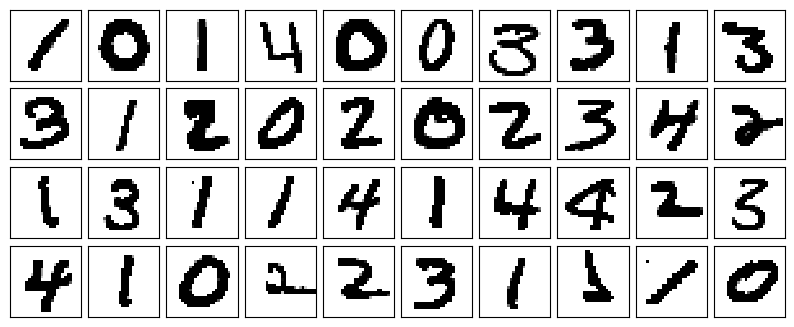

In [3]:
## Plotting the original train data
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(x)

In [4]:
## Standardizing the data
standardized_data = StandardScaler().fit_transform(x)
print(standardized_data.shape)

(21416, 784)


In [5]:
## create subset 
SUBSET_LEN=3000
x_subset = x[0:SUBSET_LEN]
y_subset = y[0:SUBSET_LEN]
print(np.unique(y_subset))


[0 1 2 3 4]


#### t-SNE
- t-SNE.
- t-SNE after PCA

In [6]:
## t-SNE
tsne=TSNE(random_state = SEED,
          n_components=2,
          verbose=0,
          perplexity=40,
          max_iter=500
          ).fit_transform(x_subset)

In [7]:
## t-SNE after PCA
pca = PCA(n_components=50)
pca_result = pca.fit_transform(x_subset)
pca_tsne=TSNE(random_state = SEED,
              n_components=2,
              verbose=0,
              perplexity=40,
              max_iter=500
              ).fit_transform(pca_result)

In [8]:
## comparision between tSNE and PCA-tSNE
import altair as alt
import pandas as pd
alt.data_transformers.enable("vegafusion")
WIDTH=500
HEIGHT=500
SAMPLE_FRAC=0.8

tsne_df=pd.DataFrame(tsne,columns=['x1','x2'])
tsne_df['label']=pd.DataFrame(y_subset)
tsne_df=tsne_df.sample(frac=SAMPLE_FRAC)
tsne_chart=alt.Chart(tsne_df).mark_point(size=10).encode(
    x=alt.X('x1',type='quantitative').axis(None),
    y=alt.Y('x2',type='quantitative').axis(None),
    color=alt.Color('label',type='nominal').legend(None)
).configure_view(
    stroke=None
).configure_axis(
    grid=False
).properties(width=WIDTH,height=HEIGHT)

pca_tsne_df=pd.DataFrame(tsne,columns=['x1','x2'])
pca_tsne_df['label']=pd.DataFrame(y_subset)
pca_tsne_df=pca_tsne_df.sample(frac=SAMPLE_FRAC)
pca_tsne_chart=alt.Chart(pca_tsne_df).mark_point(size=10).encode(
    x=alt.X('x1',type='quantitative').axis(None),
    y=alt.Y('x2',type='quantitative').axis(None),
    color=alt.Color('label',type='nominal').legend(None)
).configure_view(
    stroke=None
).configure_axis(
    grid=False
).properties(width=WIDTH,height=HEIGHT)

tsne_chart.save('tSNE_4digits.altair.png')
pca_tsne_chart.save('PCA_tSNE_4digits.altair.png')
